In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# **Analysing the India Covid Data by States**

In [8]:
#Importing the covid dataset
ind = pd.read_csv('Latest.csv', sep = ',')

In [9]:
#Displaying the first 5 rows of the data
ind.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7584,8,7447,129,0.11,98.19,1.70
1,Andhra Pradesh,2030849,14652,2002187,14010,0.72,98.59,0.69
2,Arunachal Pradesh,53807,533,53004,270,0.99,98.51,0.50
3,Assam,595669,5615,584296,5758,0.94,98.09,0.97
4,Bihar,725833,77,716098,9658,0.01,98.66,1.33


In [11]:
#Setting the index of the data by State
states = ind.set_index('State/UTs')
states.head(5)

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
State/UTs,,,,,,,
Andaman and Nicobar,7584,8,7447,129,0.11,98.19,1.70
Andhra Pradesh,2030849,14652,2002187,14010,0.72,98.59,0.69
Arunachal Pradesh,53807,533,53004,270,0.99,98.51,0.50
Assam,595669,5615,584296,5758,0.94,98.09,0.97
Bihar,725833,77,716098,9658,0.01,98.66,1.33


In [12]:
#The information of the new dataset indexed by the states names 
states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Andaman and Nicobar to West Bengal
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total Cases          36 non-null     int64  
 1   Active               36 non-null     int64  
 2   Discharged           36 non-null     int64  
 3   Deaths               36 non-null     int64  
 4   Active Ratio (%)     36 non-null     float64
 5   Discharge Ratio (%)  36 non-null     float64
 6   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.2+ KB


In [13]:
#Descriptive statistics of the covid dataset 
states.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.247105e+05,10061.305556,9.023378e+05,12311.472222,1.175000,97.558611,1.266667
std,1.363114e+06,35512.447915,1.319414e+06,23708.098573,3.103863,2.983397,0.566321
min,7.584000e+03,5.000000,7.447000e+03,4.000000,0.010000,81.330000,0.040000
25%,7.699000e+04,153.500000,7.243350e+04,814.000000,0.050000,97.722500,0.955000
50%,4.718740e+05,556.500000,4.635625e+05,5445.500000,0.460000,98.280000,1.300000
75%,1.007885e+06,5343.500000,9.939285e+05,13671.000000,0.797500,98.652500,1.585000
max,6.500617e+06,209335.000000,6.309021e+06,138169.000000,18.340000,99.920000,2.740000


In [20]:
#States with most cases, top 10.
max_cases = states.sort_values(by = 'Active', ascending = False).head(10)
max_cases 

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
State/UTs,,,,,,,
Kerala,4390489,209335,4158504,22650,4.77,94.72,0.52
Maharashtra,6500617,53427,6309021,138169,0.82,97.05,2.13
Tamil Nadu,2635419,16522,2583707,35190,0.63,98.04,1.34
Karnataka,2962408,16269,2908622,37517,0.55,98.18,1.27
Andhra Pradesh,2030849,14652,2002187,14010,0.72,98.59,0.69
Mizoram,72883,13369,59273,241,18.34,81.33,0.33
West Bengal,1557414,8096,1530731,18587,0.52,98.29,1.19
Odisha,1016833,5919,1002810,8104,0.58,98.62,0.80
Assam,595669,5615,584296,5758,0.94,98.09,0.97


**Plotting states with the most cases, top 10.**

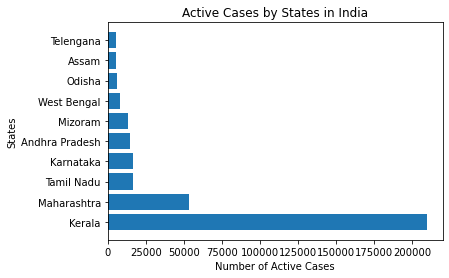

In [32]:
plt.barh(max_cases.index, width = max_cases['Active'])
plt.ylabel('States')
plt.xlabel('Number of Active Cases')
plt.title('Active Cases by States in India')
plt.show()

**Ploting the States with the most deaths, top 10.**

In [40]:
deaths = states['Deaths'].sort_values(ascending = False).head(10)
deaths

State/UTs
Maharashtra       138169
Karnataka          37517
Tamil Nadu         35190
Delhi              25083
Uttar Pradesh      22883
Kerala             22650
West Bengal        18587
Punjab             16457
Andhra Pradesh     14010
Chhattisgarh       13558
Name: Deaths, dtype: int64

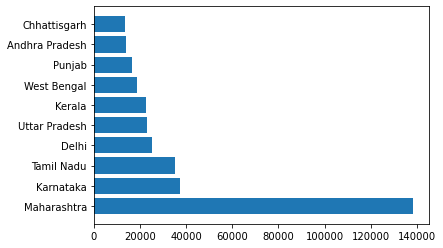

In [41]:
plt.barh(deaths.index, width = deaths)
plt.show()

**Relationship between discharge ratio and death ratio.** 

In [63]:
a = states[['Discharge Ratio (%)', 'Death Ratio (%)']]
dd = a.sort_values(by = 'Discharge Ratio (%)', ascending = False).head(10)
dd

,Discharge Ratio (%),Death Ratio (%)
State/UTs,,
Dadra and Nagar Haveli and Daman and Diu,99.92,0.04
Lakshadweep,99.46,0.49
Rajasthan,99.05,0.94
Ladakh,98.85,1.00
Gujarat,98.76,1.22
Chandigarh,98.70,1.25
Haryana,98.68,1.27
Madhya Pradesh,98.66,1.33
Bihar,98.66,1.33


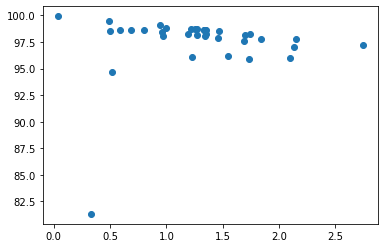

In [73]:
plt.scatter(states['Death Ratio (%)'], states['Discharge Ratio (%)'])
plt.show()